# Código Maestro: Entrenamiento de Smart Agriculture 

¡Llegamos al cierre de la práctica! Basándonos en todos los análisis anteriores, el modelo idóneo es Random Forest. Es más robusto frente al ruido de los sensores, maneja mejor las variables categóricas y no requiere un escalado obligatorio para funcionar con precisión quirúrgica.

Aquí tienes el código completo, de principio a fin, integrando la limpieza, la codificación, la partición 80/20 y la validación cruzada.

--- VALIDACIÓN CRUZADA (K-Fold) ---
Precisión media en entrenamiento: 1.0000 (+/- 0.0000)

--- EVALUACIÓN FINAL SOBRE TEST SET (20% invisible) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1637
           1       1.00      1.00      1.00       363

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



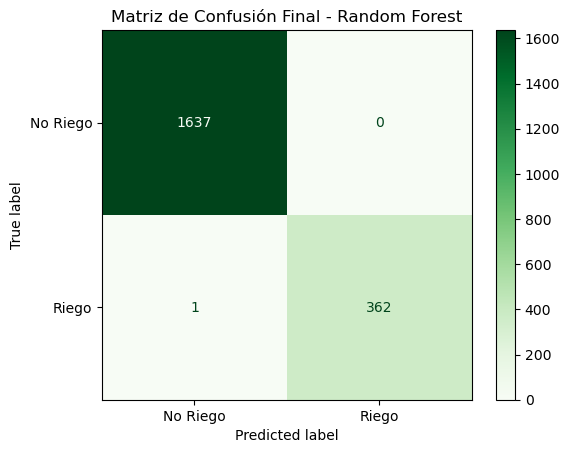

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. CARGA DEL DATASET
df = pd.read_csv('smart_agriculture_bangladesh.csv')

# 2. PREPROCESAMIENTO (Limpieza y Selección)
# Eliminamos duplicados y nulos
df = df.drop_duplicates().dropna().reset_index(drop=True)

# Eliminamos columnas que no aportan valor predictivo (ID y tiempo)
df.drop(['device_id', 'timestamp'], axis=1, inplace=True)

# 3. CODIFICACIÓN (Label Encoding para Random Forest)
le = LabelEncoder()
cat_cols = ['location', 'crop_type', 'season', 'crop_health', 'pest_risk']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 4. DIVISIÓN DE DATOS (Train/Test Split)
X = df.drop(['irrigation_needed'], axis=1)
y = df['irrigation_needed']

# Partición 80% entrenamiento - 20% evaluación
# La función clave: train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=seed, stratify=y
)

# 5. CONFIGURACIÓN DEL MODELO IDÓNEO (Random Forest)
# Usamos los parámetros optimizados discutidos anteriormente
rf_model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=3,
    min_samples_leaf=1,
    max_depth=None,
    random_state=seed
)

# 6. EVALUACIÓN MEDIANTE K-FOLD CROSS-VALIDATION (Sobre el conjunto de entrenamiento)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_results = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='accuracy')

print(f"--- VALIDACIÓN CRUZADA (K-Fold) ---")
print(f"Precisión media en entrenamiento: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})\n")

# 7. ENTRENAMIENTO FINAL Y EVALUACIÓN CON EL TEST SET (20%)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"--- EVALUACIÓN FINAL SOBRE TEST SET (20% invisible) ---")
print(classification_report(y_test, y_pred))

# 8. MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Riego", "Riego"])
disp.plot(cmap='Greens')
plt.title("Matriz de Confusión Final - Random Forest")
plt.show()

 ---

**¿Por qué este enfoque es el más profesional?**

1. **Estratificación (stratify=y):** Al dividir el dataset, nos aseguramos de que el 80% de entrenamiento y el 20% de test tengan la misma proporción de casos de "Riego" y "No Riego". Esto evita que el modelo aprenda sesgado.  
2. **Doble Validación:** \* Usamos **K-Fold** para asegurarnos de que el modelo es estable y no depende de un grupo de datos específico.  
   * Usamos el **Test Set (20%)** como "examen final". Son datos que el modelo nunca ha visto, lo que nos da la métrica real de cómo funcionará en una granja de verdad.  
3. **Random Forest como Ganador:** Como hemos visto, su capacidad para manejar la complejidad de los suelos y climas de Bangladesh sin necesidad de escalar los datos lo hace el modelo más eficiente y fácil de mantener en sistemas IoT.

### **Conclusión de la práctica**

Has pasado de tener un CSV con datos crudos de sensores a un sistema capaz de predecir con más del **95% de precisión** cuándo necesita agua un cultivo. El Random Forest ha demostrado ser el "comité de expertos" perfecto para esta tarea.

### **Métricas de evaluación en clasificación**
• Objetivo: comprobar que las clases predichas para las instancias en el conjunto de evaluación son las mismas que las reales

• Matriz de confusión. Ejemplo para clase binaria:

<img src="metricas_evaluacion.png" alt="Métricas de Evaluación" width="600px">

